# Predicting the sales price of Bullsozers using machine learning

🚜In this notebook we are going through an example machine learning project with the goal of predicting the sales price of bulldozers

## 1. Problem definition
> How well can we predict a future sales price of a bulldoxer given its characteristics and previous examples of how much bulldozers have been solved for

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition

* Train.csv is the training set, which contains data through the end of 2011.* 
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard
* 
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competitio

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
https://www.kaggle.com/c/bluebook-for-bulldozers/overview

**Note**: The goal for most regression evaluation metrics is to minimize the error. For example the goal of this project is to buid a machine learning model which minimizes RMSLE
on
## 4. Feature

Kaggle provides a data dictionary detailing all the features of the data set.
"C:\Personal\AIML\bulldozer-price-prediction-project\data\bluebook-for-bulldozers\bluebook-for-bulldozers\Data Dictionary.xlsx"
s 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Import training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

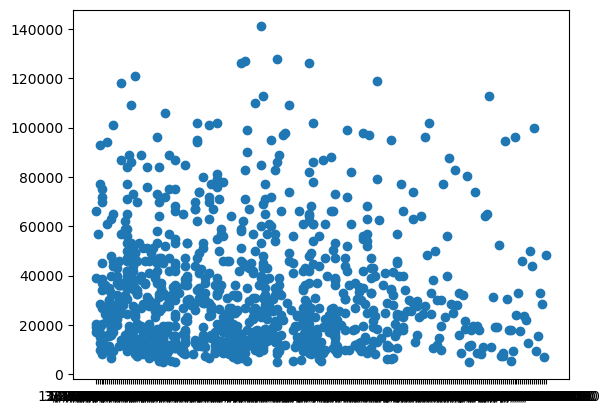

In [10]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

<Axes: >

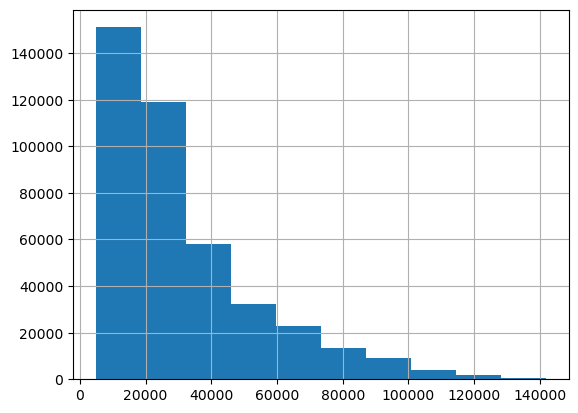

In [13]:
df.SalePrice.hist()

### Parsing Dates

When we work with Time Series data we want to enrich the time & date  component  as much as possible
We can tell Pandas which of our columns has dates in it using the 'parse-dates' parameter


In [17]:
# Import data  again but this time with Parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory =  False,
                 parse_dates=["saledate"])

In [18]:
df.saledate.dtype

dtype('<M8[ns]')

In [19]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

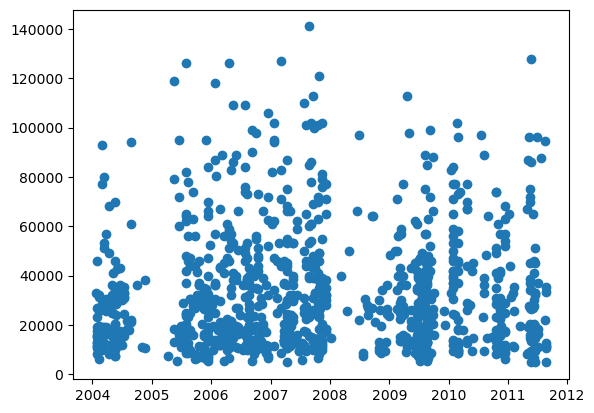

In [20]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [21]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [24]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort Data Frame by SaleDate

When working with TimeSeries data it is good idea to sort it by date

In [25]:
# Sort dataframe in date order
df.sort_values(by=["saledate"],inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe 

So when we manipulate the copy we an always revert to the original data. 

In [26]:
df_tmp = df.copy()

### Add datetime parameters for saledate column

In [28]:

df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear



In [29]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [30]:
# Now we enriched our dataframe with datetime features we can remove the saledata
df_tmp.drop("saledate",axis =1,inplace=True)

In [33]:
# Check the value of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We have done enough EDA (we could always do more), lets do some model-driven EDA

In [37]:
#Lets build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

### Convert strings into categories

One way to turn all strings into numbers is to convert them into categories
We can check the different data types compatible with Pandas here --
https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html

In [39]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [90]:
pd.api.types.is_string_dtype(df_tmp["Hydraulics"])

False

In [119]:
# Find the columns that contain strings
for labels,content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(labels)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [75]:
# If you are wondering what df.items() does
random_dict = {"key1":"Hello",
               "key2":"world"}
for key, values in random_dict.items():
    print (f"this is a key :{key}"),
    print(f"This is a value :{values}")
    

this is a key :key1
This is a value :Hello
this is a key :key2
This is a value :world


In [120]:
# THis will turn all of the string values into category values
for label,content in df_tmp.items():
    #print(f"Label is :\"{label}\" and Content is: \"{content}\"")
    if pd.api.types.is_object_dtype(content):
       df_tmp[label] = content.astype("category").cat.as_ordered()

In [121]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [118]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [122]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [128]:
df_tmp.Hydraulics.cat.codes

205615    0
274835    0
141296    0
212552    0
62755     0
         ..
410879    0
412476    3
411927    3
407124    4
409203    0
Length: 412698, dtype: int8

Thanks to Pandas categories we now have a way to access all of our data in the form of numbers.
 But we still have a bunch of missing data...

In [130]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [131]:
# Export current temp dataframe
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",index=False)

In [133]:
# Import preprocessed csv
df_tm_2 = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory= False)
df_tm_2.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [134]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill numeric missing values first


In [135]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print (label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayofYear


In [140]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            

auctioneerID
MachineHoursCurrentMeter


In [148]:
# Fill numeric rows with median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label +"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with Median
            df_tmp[label] = content.fillna(content.median())
            
         

In [149]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [150]:
# Check if there is any null numeric values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [151]:
    # Check to see how many examples are missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [152]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables in numbers

In [153]:
# Check for columns which arent numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [155]:
# Turn variable categories into numbers and fill missing
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample had any missing data
        df_tmp[label+"_is_missing"] =  pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes +1

In [159]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [161]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

Now that all oof our data is numeric and the DF has no missing values we should be able to fit a model

In [162]:
%%time
#Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state= 42)

#Fit the model
model.fit(df_tmp.drop("SalePrice",axis =1),df_tmp["SalePrice"])

CPU times: total: 30min 59s
Wall time: 4min 57s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [163]:
%%time
# Score the model
model.score(df_tmp.drop("SalePrice",axis =1),df_tmp["SalePrice"])

CPU times: total: 24.5 s
Wall time: 4.14 s


0.9875468079970562

**Question**: Why doesnt this aboce metrichold water (why istn it not reliable)

In [164]:
pip install jupyternotify

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached jsonpointer-2.4-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-1.13-py3-none-any.whl.metadata (2.6 kB)
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
Using cached jsonpointer-2.4-py2.py3-none-any.whl (7.8 kB)
Using cached webcolors-1.13-py3-none-any.whl (14 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
Using cached arrow-1.3.0-py3-none-any.whl (66 kB)
  Created wheel for jupyternotify: filename=jupyternotify-0.1.15-py3-none-any.whl size=8771 sha256=081283dee48a1142bdef32eccb5afd7f56b5b10a132f446afcfa55c3e4391aaa
  Stored i

In [165]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [170]:
%%notify
import time
time.sleep(2)
print("FInished")


FInished


<IPython.core.display.Javascript object>

In [173]:
## Splitting data into training and validation sets
df_val = df_tmp[df_tmp.saleYear==2012]
df_train =  df_tmp[df_tmp.saleYear !=2012]
len(df_val),len(df_train)

(11573, 401125)

In [176]:
# Split data into X and y
X_train,y_train  = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [177]:
y_train

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
393098    29000.0
400217    11000.0
400302    11000.0
400393    18000.0
393123    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [180]:
# Create an evaluation function (the competition used MSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculate Root Mean Squared Log Error between predictions and true label
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds  =  model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE":mean_absolute_error(y_train,train_preds),
              "Valid MAE":mean_absolute_error(y_valid,val_preds),
              "Trainind RMSLE":rmsle(y_train,train_preds),
              "Valid RMSLE":rmsle(y_valid,val_preds),
              "Training R2":r2_score(y_train,train_preds),
              "Valid R2": r2_score(y_valid,val_preds)
             }
    return scores


    
                   


## Testing our model on a subset (tuning using Hyperparameters)


In [181]:
# # This takes too long
# %%time
# model =  RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(X_train,y_train)


In [182]:

# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples= 10000)


In [183]:
%%time
#Cutting down on the max_samples will reduce the training time
model.fit(X_train,y_train)

CPU times: total: 1min 9s
Wall time: 10.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [185]:
    show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Trainind RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R2': 0.8606658995199189,
 'Valid R2': 0.8320374995090507}

### Hyperamater tuning with RandomizedSearchCV

In [197]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#Create different random forest regression hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
           "max_depth":[None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features":[0.5,1,'sqrt',None],
           "max_samples": [10000]
          }

#instantiate RandomizeSearchCV
rs_model =  RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                     random_state=42),
                               param_distributions=rf_grid,
                               n_iter=100,
                               cv=5,
                               verbose=True)
#Fit the Randomized Search CV Model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 5min 25s
Wall time: 22min 27s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', None],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [198]:
# Find the best parameters
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [199]:
# Evaluate the randomizedsearchmodel
show_scores(rs_model)

{'Training MAE': 6256.95234154064,
 'Valid MAE': 7606.783257243553,
 'Trainind RMSLE': 0.2826036520391075,
 'Valid RMSLE': 0.30803270167423463,
 'Training R2': 0.8254591252042722,
 'Valid R2': 0.8108702149915701}

### Train a model with the best parameters
**Note**. THese were found after 100 iterations

In [194]:
%%time

#most ideal hyperparameters
ideal_model =  RandomForestRegressor(n_estimators=40,
                                     min_samples_leaf=1,
                                     min_samples_split=14,
                                     max_features=0.5,
                                     n_jobs=-1,
                                     max_samples=None,
                                    random_state =42)

#Fit the model
ideal_model.fit(X_train,y_train)
                                    
                        

CPU times: total: 4min 7s
Wall time: 40.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [201]:
# Scores for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2959.0352469918025,
 'Valid MAE': 5959.83146801585,
 'Trainind RMSLE': 0.1447807826004406,
 'Valid RMSLE': 0.24666110750028983,
 'Training R2': 0.9587455163094911,
 'Valid R2': 0.8821753583483276}

In [200]:
# Scores for ideal model (trained on 10000 rows)
show_scores(rs_model)

{'Training MAE': 6256.95234154064,
 'Valid MAE': 7606.783257243553,
 'Trainind RMSLE': 0.2826036520391075,
 'Valid RMSLE': 0.30803270167423463,
 'Training R2': 0.8254591252042722,
 'Valid R2': 0.8108702149915701}

## Make predictions on test data

In [231]:
# Import the test data
df_test =  pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                       low_memory=False,
                       parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [232]:
# make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


In [233]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing the date (getting the test dataset in the same format as the train dataset)

In [242]:
def preprocess_data(passeddf):
    """
    Performs transformaton on DF and returns processed data frame
    """
    passeddf["saleYear"] = passeddf.saledate.dt.year
    passeddf["saleMonth"] = passeddf.saledate.dt.month
    passeddf["saleDay"] = passeddf.saledate.dt.day
    passeddf["saleDayOfWeek"] = passeddf.saledate.dt.dayofweek
    passeddf["saleDayofYear"] = passeddf.saledate.dt.dayofyear
   
    passeddf.drop("saledate",axis =1, inplace = True)

    #Fill the missing numericals with median
    # Fill numeric rows with median
    for label, content in passeddf.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                passeddf[label +"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with Median
                passeddf[label] = content.fillna(content.median())

        #COnvert object to categories and fill missing data and convert to numbers
        if not pd.api.types.is_numeric_dtype(content):
            passeddf[label + "_is_missing"] = pd.isnull(content)
            #we add +1 to the categories code as Pandas encodes missing categories as -1
            passeddf[label] = pd.Categorical(content).codes +1
    return passeddf

In [244]:
#Process the test data
df_test = preprocess_data(df_test)
df_test.head()


AttributeError: 'DataFrame' object has no attribute 'saledate'

In [246]:
df_test.UsageBand

0        2
1        1
2        3
3        1
4        2
        ..
12452    0
12453    0
12454    0
12455    0
12456    0
Name: UsageBand, Length: 12457, dtype: int8

In [247]:
#Make Predictions on updated Test data

test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [248]:
# Check difference  in columns using a Python set
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [249]:
#Manually adjust df_test to have auctioneer_id_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test data frame has same features as training data frame

In [257]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True
Steering_Controls_is_missing,True,False,True,True,True


In [253]:

test_preds = ideal_model.predict(df_test)
                                

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [254]:
 # Check difference  in columns using a Python set
set(X_train.columns) - set(df_test.columns)

set()

In [259]:
df_test = df_test[X_train.columns]
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [260]:
test_preds = ideal_model.predict(df_test)

In [262]:
len(test_preds)

12457

In [263]:
# FOrmat predictions into the same format Kaggle is after. -https://www.kaggle.com/c/bluebook-for-bulldozers/overview
df_preds = pd.DataFrame()
df_preds["SalesID"] =  df_test["SalesID"]
df_preds["SalesPrice"] =  test_preds
df_preds



,SalesID,SalesPrice
0,1227829,18147.808383
1,1227844,16853.462666
2,1227847,54554.164117
3,1227848,60944.511264
4,1227863,55593.227356
...,...,...
12452,6643171,40363.496069
12453,6643173,12899.003161
12454,6643184,14287.628184
12455,6643186,17402.674437


In [264]:
# Export prediction data to CSV
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv",index=False)

 ### Feature importance

Feature importance seeks to figure out which different attributes of the data were important when it comes to predicting the target variable

In [265]:
# Find feature importance of our ideal model
ideal_model.feature_importances_

array([3.26018802e-02, 2.26259354e-02, 4.31602841e-02, 1.86317661e-03,
       3.33901215e-03, 1.89746767e-01, 3.23084168e-03, 1.01770892e-03,
       4.34889369e-02, 3.86983800e-02, 7.43499974e-02, 4.70285347e-03,
       2.22150487e-02, 1.30367334e-01, 4.39557729e-02, 5.99980549e-03,
       3.25422697e-03, 3.77282734e-03, 3.27971016e-03, 7.08943652e-02,
       6.26746696e-04, 1.15100454e-04, 1.11922128e-03, 2.21841348e-04,
       1.35040629e-03, 2.37350976e-05, 1.46827728e-04, 1.22400428e-02,
       4.76150762e-03, 3.50858266e-04, 5.03470380e-03, 1.75404893e-03,
       3.43209380e-03, 1.05755475e-03, 3.81765530e-04, 1.78101404e-02,
       8.40885437e-04, 1.54817776e-02, 2.31746721e-03, 1.01180799e-03,
       7.23726227e-04, 9.93496529e-04, 1.90178118e-03, 6.76515711e-04,
       3.41932951e-04, 3.62228709e-04, 2.22418611e-04, 1.72866173e-03,
       8.90856916e-04, 1.88913343e-04, 3.67543800e-04, 7.38007793e-02,
       3.77753035e-03, 5.68727255e-03, 2.93560212e-03, 9.83053086e-03,
      

In [272]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importances":importances})
        .sort_values("feature_importances", ascending = False)
        .reset_index(drop=True))
    # Plot the data frame we created
    fig,ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

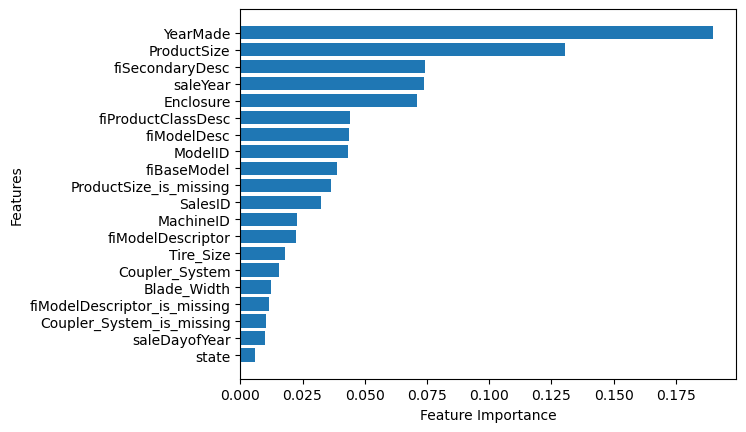

In [273]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [278]:
df["Enclosure"].value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64